In [35]:
import requests
import json
import pandas as pd
import time
import datetime

def main():
    tables = []
    
    for i in range(373801, 378500, 1000): #цикл по longitude
         for j in range(556101, 559001, 1000): #цикл по latitude
            time.sleep(1)
            lng = i/10000
            lat = j/10000
            params = {'lng': lng, 'lat': lat}
            response_new = requests.get('https://carsharing-search.ru/cars',
            params=params)
            # print(response.url)
            data_new = json.loads(response_new.text)
            Table_new = pd.DataFrame.from_records(data_new['data'])
            tables.append(Table_new) 
        
    
    mod_Table = pd.concat(tables)
    mod_Table.drop_duplicates(subset=['latitude', 'longitude'])    #Называем файл по дате
    file_name="Day_"+datetime.datetime.today().strftime("%Y-%m-%d")+".csv"
    # df = pd.read_csv('.csv', usecols=['model', 'price'])
    mod_Table.to_csv(file_name,index = False)

main()        


KeyboardInterrupt: 

In [23]:
    import requests
    response = requests.get('https://carsharing-search.ru/cars?lng=35.00&lat=52.00')
    import json
    data = json.loads(response.text)
    
    import pandas as pd
    Table = pd.DataFrame.from_records(data['data'])
    
    
    for i in range(373801, 378500, 1000): #цикл по longitude
         for j in range(556101, 559001, 1000): #цикл по latitude
            lng = i/10000
            lat = j/10000
            params = {'lng': lng, 'lat': lat}
            response_new = requests.get('https://carsharing-search.ru/cars',
            params=params)
            # print(response.url)
            data_new = json.loads(response_new.text)
            Table_new = pd.DataFrame.from_records(data_new['data'])
            Table_new.columns.name = None
            mod_Table = Table.append(Table_new,ignore_index=True) 
        
    #Называем файл по дате
    import datetime
    file_name="Day_"+datetime.datetime.today().strftime("%Y-%m-%d")+".csv"
    # df = pd.read_csv('.csv', usecols=['model', 'price'])
    Table_new.to_csv(file_name,index = False)
    TableCSV = pd.read_csv(file_name)

In [14]:
    import requests
    response = requests.get('https://carsharing-search.ru/cars?lng=35.00&lat=52.00')
    import json
    data = json.loads(response.text)
    
    import pandas as pd
    Table = pd.DataFrame.from_records(data['data'])

In [25]:
mod_Table

,fuel,model,price,company,number,parking,latitude,longitude
0,0.48,Youdrive,NaN,[1],,NaN,55.904972,37.578712
1,0.62,Youdrive,NaN,[1],,NaN,55.880160,37.429676
2,0.96,Kia Rio,7.5,[1],,2.5,55.705820,37.400680
3,0.52,Kia Rio,7.5,[1],,2.5,55.740056,37.740028
4,0.98,Kia Rio,7.5,[1],,2.5,55.687552,37.563692
...,...,...,...,...,...,...,...,...
28961,0.00,BelkaCar,NaN,[32],,NaN,43.683014,40.262255
28962,1.00,Kia Rio X-line,NaN,[32],,NaN,43.409385,39.960230
28963,1.00,Kia Rio X-line,NaN,[32],,NaN,43.629433,39.716414
28964,1.00,Kia Rio X-line,NaN,[32],,NaN,43.399490,39.971626


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

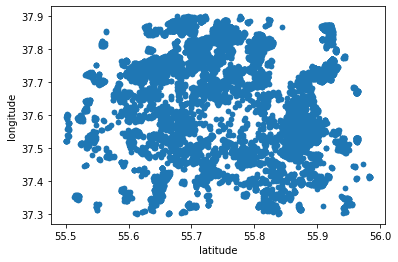

In [34]:
# mod_Table[['latitude', 'longitude']].plot.scatter('latitude', 'longitude')

mod_Table.loc[(mod_Table['longitude'] < 37.9) & (mod_Table['longitude'] > 37.3) & (mod_Table['latitude'] < 56.) & (mod_Table['latitude'] > 55.5)].plot.scatter('latitude', 'longitude')

In [31]:
#mod_Table.drop_duplicates( 'latitude', keep='last') # вот так вот работает, просто по строкам нет (или там просто нет дубляжа ?)

In [30]:
mod_Table.drop_duplicates(subset=['latitude', 'longitude'])

,fuel,model,price,company,number,parking,latitude,longitude
0,0.48,Youdrive,NaN,[1],,NaN,55.904972,37.578712
1,0.62,Youdrive,NaN,[1],,NaN,55.880160,37.429676
2,0.96,Kia Rio,7.5,[1],,2.5,55.705820,37.400680
3,0.52,Kia Rio,7.5,[1],,2.5,55.740056,37.740028
4,0.98,Kia Rio,7.5,[1],,2.5,55.687552,37.563692
...,...,...,...,...,...,...,...,...
14478,0.00,BelkaCar,NaN,[32],,NaN,43.683014,40.262255
14479,1.00,Kia Rio X-line,NaN,[32],,NaN,43.409385,39.960230
14480,1.00,Kia Rio X-line,NaN,[32],,NaN,43.629433,39.716414
14481,1.00,Kia Rio X-line,NaN,[32],,NaN,43.399490,39.971626
